### Cargar set de datos

Importart `numpy` y `pandas`

Cargar `./data/drings.csv`

Mostrar el head.

In [19]:
import numpy as np
import pandas as pd

In [20]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv"
df = pd.read_csv(url)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Explorar la función `melt` y sus parámetros

Parámetros:
- `value_vars`
- `id_vars`: son los identificadores de las columnas que queremos enviar.
- `var_name`

Si quiere que por país se separe en 3 filas dependiendo de la bebida

In [21]:
df2 = df.melt(value_vars=['beer_servings', 'spirit_servings', 'wine_servings']) #Se pierden las columnas
df2 = df.melt(id_vars=['country', 'continent'], value_vars=['beer_servings', 'spirit_servings', 'wine_servings']) #Agrega las columnas
df2 = df.melt(id_vars=['country', 'continent'], value_vars=['beer_servings', 'spirit_servings', 'wine_servings'], var_name='servings') #Renombra la columna agregada
df2['servings'] = df2['servings'].map({'beer_servings':'beer','spirit_servings':'spirint', 'wine_servings':'wine'}) #Con map selecciono una columnas y puedo cambiar cada palabra por una nueva usando un diccionario
df2.head()

,country,continent,servings,value
0,Afghanistan,AS,beer,0
1,Albania,EU,beer,89
2,Algeria,AF,beer,25
3,Andorra,EU,beer,245
4,Angola,AF,beer,217


### Explorar la función `groupby` y sus parámetros

Parámetros:
- `by`
- `as_index`

Agrupar las bebidas por continente y calcular, la media y el desvío standard.
Colocar ambos valores calculados en un único DF.

#### Versión 1

Columnas:
- `beer_mean`
- `spirit_mean`
- `wine_mean`
- `beer_std`
- `spirit_std`
- `wine_std`

ID:
- `continent`

Queremos calcular las medias y desvíos para cada continente.

In [22]:
dfg = df.drop(columns='country').groupby('continent') #Descarta la columna country y agrupa por continente
dfg = df.drop(columns='country').groupby('continent', as_index=False) #No aparecen con índice, sino que van a ser 0, 1, 2...
dfg = df.groupby('continent', as_index=False)[['beer_servings', 'spirit_servings', 'wine_servings']] # También podemo agrupar y seleccionar las columnas que queremos
df_mean = dfg.mean()
df_mean = df_mean.rename(columns={
    'beer_servings'   : 'beer_mean',
    'spirit_servings' : 'spirit_mean',
    'wine_servings'   : 'wine_mean',
}) #Puedo renombrar las columnas
# df_mean = df.groupby('continent', as_index=True)[['beer_servings', 'spirit_servings', 'wine_servings']].mean() #Las variables las agrupamos por índices y en negrita
# df_mean = df_mean.reset_index() #Resetea el índice 
df_mean.head()

,continent,beer_mean,spirit_mean,wine_mean
0,AF,61.471698,16.339623,16.264151
1,AS,37.045455,60.840909,9.068182
2,EU,193.777778,132.555556,142.222222
3,OC,89.687500,58.437500,35.625000
4,SA,175.083333,114.750000,62.416667


In [23]:
df_std = dfg.std()
df_std = df_std.rename(columns={
    'beer_servings'   : 'beer_std',
    'spirit_servings' : 'spirit_std',
    'wine_servings'   : 'wine_std',
})
df_std.head()
# Como en el caso anterior pero con std

,continent,beer_std,spirit_std,wine_std
0,AF,80.557816,28.102794,38.846419
1,AS,49.469725,84.362160,21.667034
2,EU,99.631569,77.589115,97.421738
3,OC,96.641412,70.504817,64.555790
4,SA,65.242845,77.077440,88.620189


In [24]:
df4 = pd.concat([df_mean, df_std], axis=1)
df4.head()

,continent,beer_mean,spirit_mean,wine_mean,continent,beer_std,spirit_std,wine_std
0,AF,61.471698,16.339623,16.264151,AF,80.557816,28.102794,38.846419
1,AS,37.045455,60.840909,9.068182,AS,49.469725,84.362160,21.667034
2,EU,193.777778,132.555556,142.222222,EU,99.631569,77.589115,97.421738
3,OC,89.687500,58.437500,35.625000,OC,96.641412,70.504817,64.555790
4,SA,175.083333,114.750000,62.416667,SA,65.242845,77.077440,88.620189


#### Versión 2

Columnas:
- `mean`
- `std`

ID:
- `continent`
- `drink`

Ahora se quiere solo 2 columnas y como índice el continente y la bebida.

In [25]:
df_mean_b = df_mean.rename(columns={'beer_mean':'beer', 'spirit_mean':'spirit', 'wine_mean':'wine'}) #Le saco lo que dice mean porque los voy a poner por columnas
df_mean_b = df_mean_b.melt(id_vars=['continent'], value_vars=['beer', 'spirit', 'wine'], var_name='drink') #Como ya es una tabla lo que hago con melt es pasar cosas de columnas a filas 
df_mean_b = df_mean_b.rename(columns={'value':'mean'}) #Le cambia al nombre a la columna una vez generada.
df_mean_b.head(18) 
# Tengo el triple de filas

,continent,drink,mean
0,AF,beer,61.471698
1,AS,beer,37.045455
2,EU,beer,193.777778
3,OC,beer,89.687500
4,SA,beer,175.083333
5,AF,spirit,16.339623
6,AS,spirit,60.840909
7,EU,spirit,132.555556
8,OC,spirit,58.437500
9,SA,spirit,114.750000


In [26]:
df_std_b = df_std.rename(columns={'beer_std':'beer', 'spirit_std':'spirit', 'wine_std':'wine'})
df_std_b = df_std_b.melt(id_vars=['continent'], value_vars=['beer', 'spirit', 'wine'], var_name='drink')
df_std_b = df_std_b.rename(columns={'value':'std'})
df_std_b.head()
#Calculo ahora la varianza

,continent,drink,std
0,AF,beer,80.557816
1,AS,beer,49.469725
2,EU,beer,99.631569
3,OC,beer,96.641412
4,SA,beer,65.242845


In [27]:
df5 = pd.concat([df_mean_b, df_std_b['std']], axis=1)
df5.head()
#Tenemos por contiente entonces el tipo de bebida

,continent,drink,mean,std
0,AF,beer,61.471698,80.557816
1,AS,beer,37.045455,49.469725
2,EU,beer,193.777778,99.631569
3,OC,beer,89.687500,96.641412
4,SA,beer,175.083333,65.242845


### Graficar el promedio en cada continente y 

<Axes: xlabel='continent', ylabel='mean'>

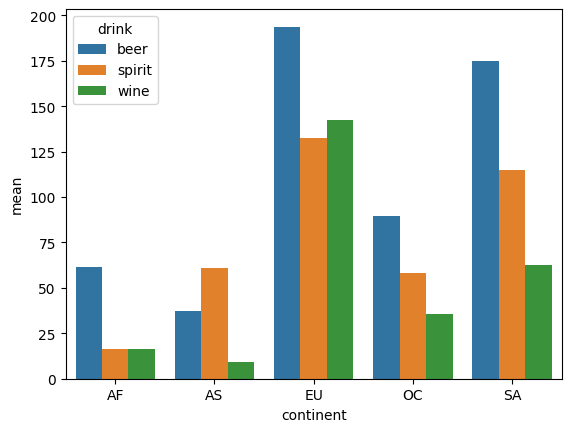

In [28]:
import seaborn as sns
sns.barplot(data=df5, x='continent', y='mean', hue='drink') #hue es el tipo de bebida

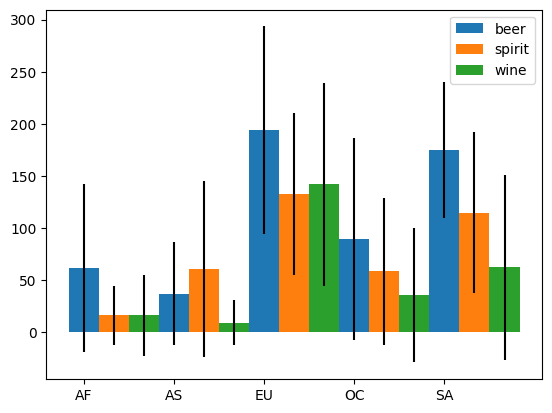

In [29]:
import matplotlib.pyplot as plt
drinks = ('beer', 'spirit', 'wine',)
width = 1./len(drinks)
for i,drink in enumerate(drinks):
    mask = df5['drink'] == drink
    y = np.array(df5[mask]['mean'])
    sd = np.array(df5[mask]['std'])
    x = np.arange(len(y)) + i * width
    plt.bar(x, y, width=width, yerr=sd)

c = np.unique(np.array(df5[mask]['continent']))
x = np.arange(len(c))
plt.xticks(x, labels=c)
plt.legend(drinks)
plt.show()

In [30]:
# df['continent'] = df['continent'].fillna('NaC')
df6 = df.melt(id_vars=['country', 'continent'], value_vars=['beer_servings', 'spirit_servings', 'wine_servings'], var_name='drink')
df6['drink'] = df6['drink'].map({'beer_servings':'beer', 'spirit_servings':'spirit', 'wine_servings':'wine'})
df6.head(n=10)

,country,continent,drink,value
0,Afghanistan,AS,beer,0
1,Albania,EU,beer,89
2,Algeria,AF,beer,25
3,Andorra,EU,beer,245
4,Angola,AF,beer,217
5,Antigua & Barbuda,NaN,beer,102
6,Argentina,SA,beer,193
7,Armenia,EU,beer,21
8,Australia,OC,beer,261
9,Austria,EU,beer,279


<Axes: xlabel='continent', ylabel='value'>

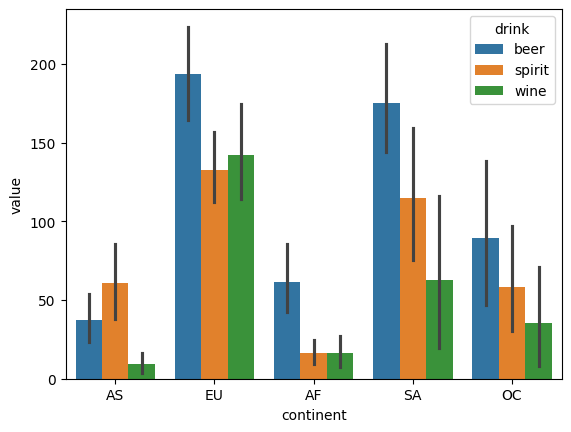

In [31]:
sns.barplot(data=df6, x='continent', y='value', hue='drink') #seaborn nos muestra directamente la desviación estandar a menos que le ponga otro argumento que diga errorbar = None 

### Ejemplo con multilpes aggregations

In [32]:
aux = dfg.agg([np.mean, np.std])
aux.head()

#Con agg le paso una lista de operaciones por columna. Entonces quedan columnas con multi índice que sería una lista de tuplas, lo que es engorroso para trabajar.

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_1554/3808652219.py:1: FutureWarning: The provided callable <function mean at 0x1080f55a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aux = dfg.agg([np.mean, np.std])
/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_1554/3808652219.py:1: FutureWarning: The provided callable <function std at 0x1080f56c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  aux = dfg.agg([np.mean, np.std])


continent beer_servings            spirit_servings            wine_servings  \
                     mean        std            mean        std          mean   
0        AF     61.471698  80.557816       16.339623  28.102794     16.264151   
1        AS     37.045455  49.469725       60.840909  84.362160      9.068182   
2        EU    193.777778  99.631569      132.555556  77.589115    142.222222   
3        OC     89.687500  96.641412       58.437500  70.504817     35.625000   
4        SA    175.083333  65.242845      114.750000  77.077440     62.416667   

              
         std  
0  38.846419  
1  21.667034  
2  97.421738  
3  64.555790  
4  88.620189

In [33]:
columns = ['_'.join(a) for a in aux.columns] #Hago un for por todas las columnas y las uno con _ con el método para strings llamado join
print(columns)
aux.columns = columns #Ahora actualizo las columnas para que se llamen así
aux.head()


['continent_', 'beer_servings_mean', 'beer_servings_std', 'spirit_servings_mean', 'spirit_servings_std', 'wine_servings_mean', 'wine_servings_std']


,continent_,beer_servings_mean,beer_servings_std,spirit_servings_mean,spirit_servings_std,wine_servings_mean,wine_servings_std
0,AF,61.471698,80.557816,16.339623,28.102794,16.264151,38.846419
1,AS,37.045455,49.469725,60.840909,84.362160,9.068182,21.667034
2,EU,193.777778,99.631569,132.555556,77.589115,142.222222,97.421738
3,OC,89.687500,96.641412,58.437500,70.504817,35.625000,64.555790
4,SA,175.083333,65.242845,114.750000,77.077440,62.416667,88.620189


In [34]:
dfg['beer_servings'].agg({'Mean':np.mean, 'Std':np.std})

IndexError: Column(s) ['beer_servings', 'spirit_servings', 'wine_servings'] already selected

### Ejemplo de pivot

In [36]:
df6.head()
df6.pivot(index=['country', 'drink'], columns='continent', values='value').head(n=10)
#Ahora queremos hacer la operación contraria, generar una columna para cada continente
#Le damos los índices que son los que vamos a mantener como columnas.
#Le decimo que las columnas van a ser lo continentes
#También podría cambiar drink por continent

continent           NaN    AF   AS     EU  OC  SA
country     drink                                
Afghanistan beer    NaN   NaN  0.0    NaN NaN NaN
            spirit  NaN   NaN  0.0    NaN NaN NaN
            wine    NaN   NaN  0.0    NaN NaN NaN
Albania     beer    NaN   NaN  NaN   89.0 NaN NaN
            spirit  NaN   NaN  NaN  132.0 NaN NaN
            wine    NaN   NaN  NaN   54.0 NaN NaN
Algeria     beer    NaN  25.0  NaN    NaN NaN NaN
            spirit  NaN   0.0  NaN    NaN NaN NaN
            wine    NaN  14.0  NaN    NaN NaN NaN
Andorra     beer    NaN   NaN  NaN  245.0 NaN NaN

# Más ejemplos con Seaborn

In [459]:
df6['continent'] = df6['continent'].fillna('NaC')
df6.head(10)

,country,continent,drink,value
0,Afghanistan,AS,beer,0
1,Albania,EU,beer,89
2,Algeria,AF,beer,25
3,Andorra,EU,beer,245
4,Angola,AF,beer,217
5,Antigua & Barbuda,NaC,beer,102
6,Argentina,SA,beer,193
7,Armenia,EU,beer,21
8,Australia,OC,beer,261
9,Austria,EU,beer,279


<Axes: xlabel='value', ylabel='Density'>

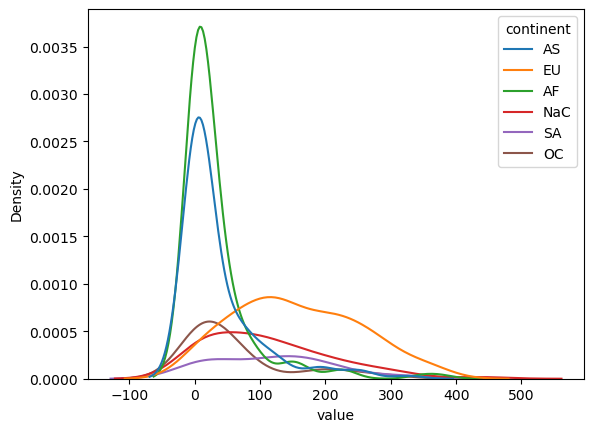

In [460]:
sns.kdeplot(data=df6, x='value', hue='continent')
#Hacemos la estimación de la densidad para cada continente

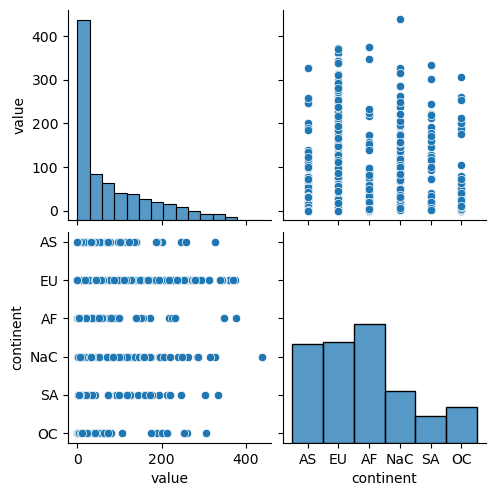

In [461]:
sns.pairplot(data=df6, y_vars=['value', 'continent'], x_vars=['value', 'continent'])
#Podemos elegir cuales contra cuales dibujar

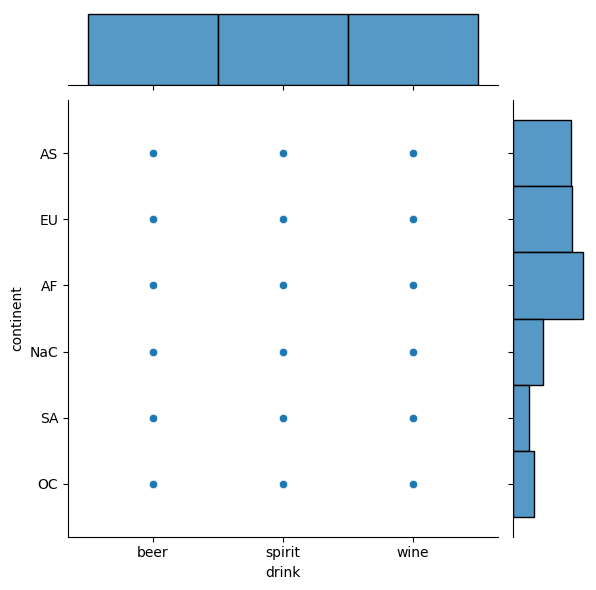

In [462]:
sns.jointplot(data=df6, x='drink', y='continent')

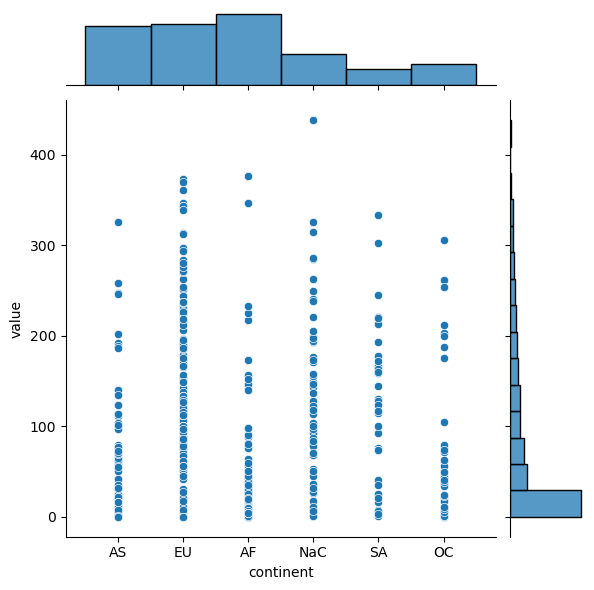

In [463]:
sns.jointplot(data=df6, x='continent', y='value') #Son los que no están en la diagonal

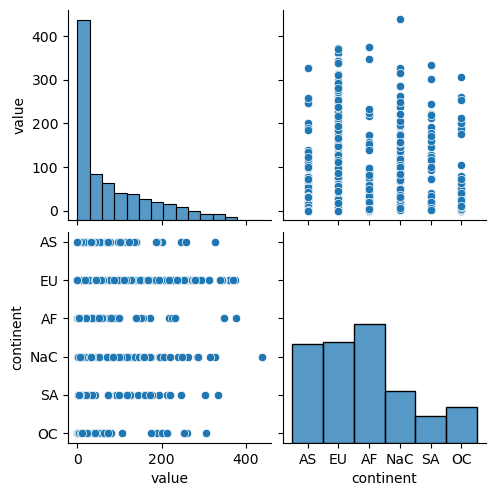

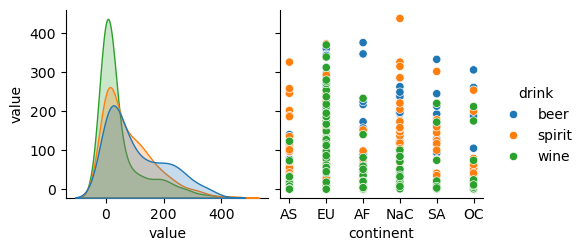

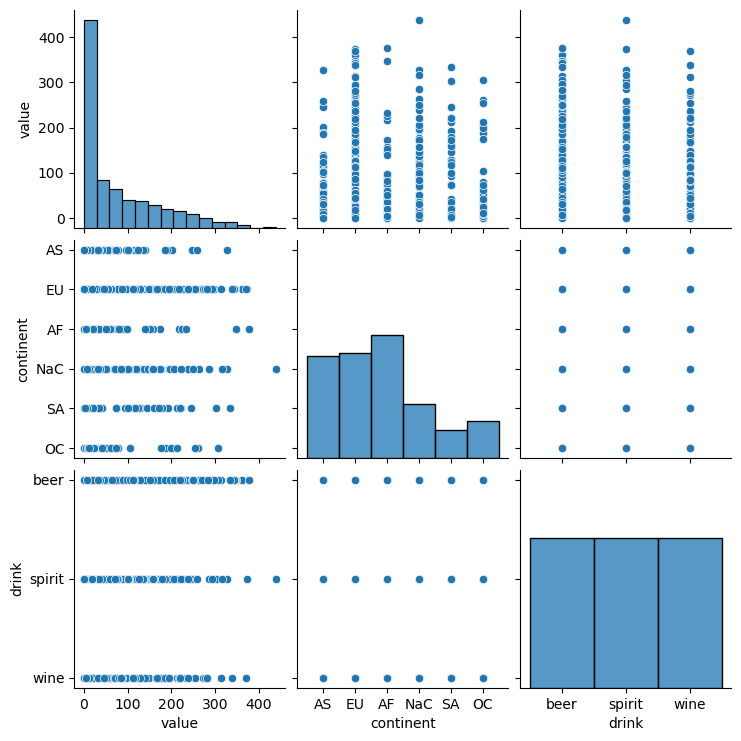

In [464]:
sns.pairplot(data=df6, vars=['value', 'continent'])
sns.pairplot(data=df6, x_vars=['value', 'continent'], y_vars='value', hue='drink') #Hue no funciona porque cambia el tipo de los de la diagonal 
sns.pairplot(data=df6, vars=['value', 'continent', 'drink'])

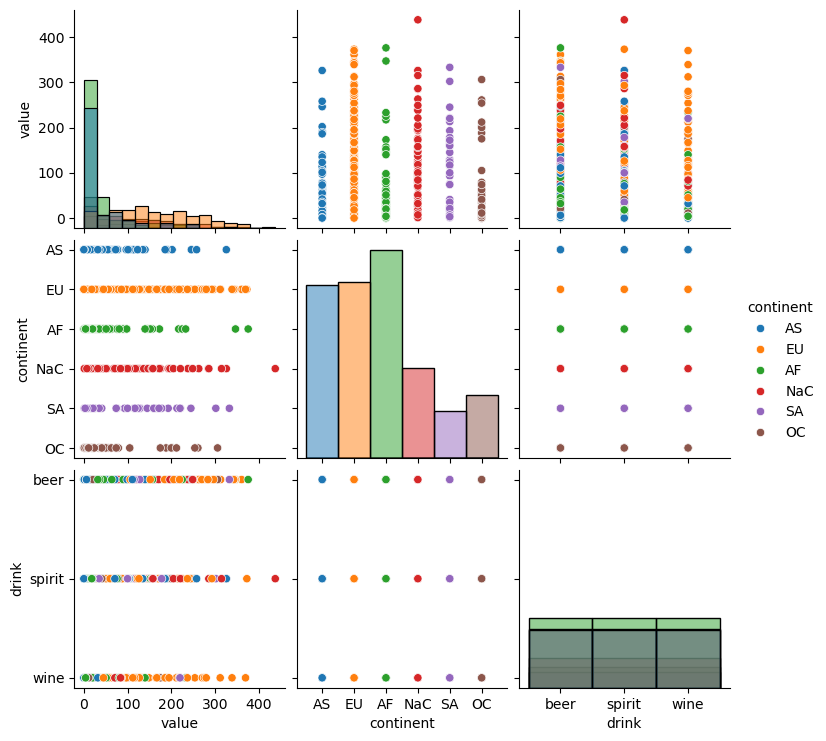

In [469]:
sns.pairplot(data=df6, vars=['value', 'continent', 'drink'], hue='continent', diag_kind='hist')
#Si fuerzo a que sea hist sí puedo usar el hue

In [37]:
df7 = df6.copy()
df7['drink'] = df7['drink'].map({'beer':0, 'spirit':1, 'wine':2})
df7.head(1)

,country,continent,drink,value
0,Afghanistan,AS,0,0


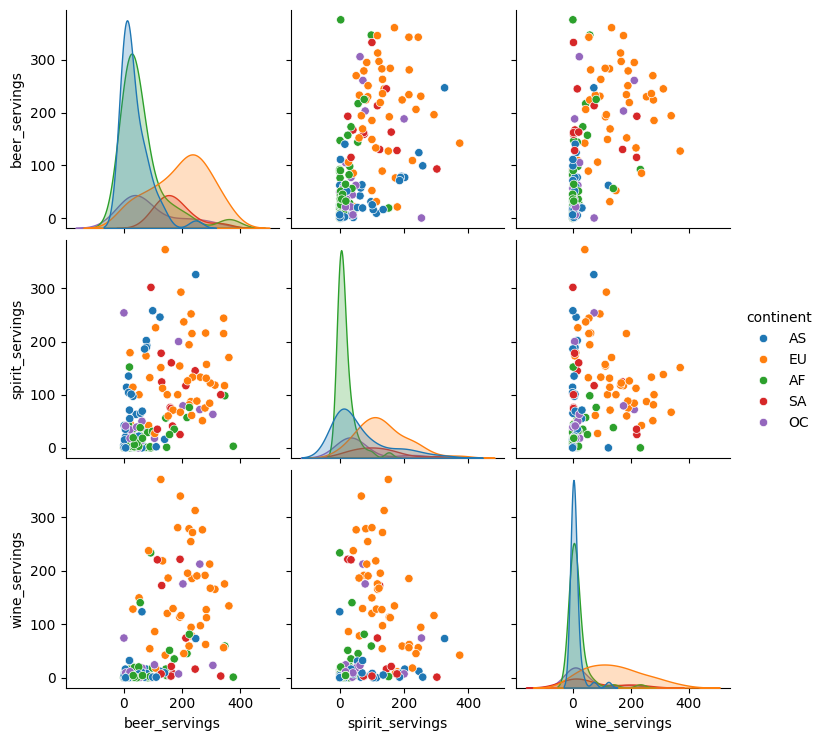

In [39]:
sns.pairplot(data=df.drop(columns='total_litres_of_pure_alcohol'), hue='continent')
#Muestra las relaciones entre cada bebida para cada uno de los continentes en colores